In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random

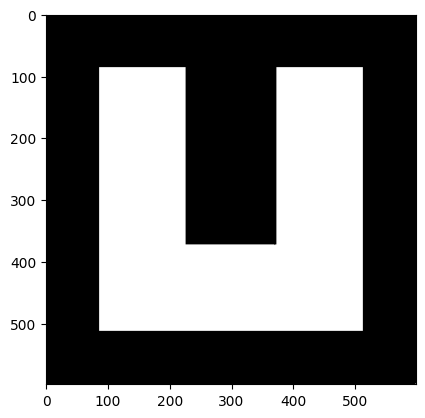

In [ ]:
image_path = "/content/shape1.tif"
image1 = plt.imread(image_path)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(image1, cmap = 'gray')

#Task 1: Dilation and Erosion
You are required to implement two functions that will simulate the behaviour of morphological Dilation and Erosion. For each of these functions, we will be considering a parameter, $SE$, which denotes the structuring element which we will need to preconstruct before passing them to the corresponding function.

Complete the two functions given in the following code cells:

In [ ]:
def dilation(image,size):
  h, w = image.shape
  result = np.zeros((h,w))

  for i in range(h):
    for j in range(w):
      for a in range(i-(size//2), i+(size//2)+1):
        for b in range(j-(size//2), j+(size//2)+1):
          if ( (a>=0 and a<h) and (b>=0 and b<w) ):
            result[i][j] = max(result[i][j], image[a][b])

  return result

In [ ]:
def erosion(image,size):
  h, w = image.shape
  result = np.ones((h,w)) * 255

  for i in range(h):
    for j in range(w):
      for a in range(i-(size//2), i+(size//2)+1):
        for b in range(j-(size//2), j+(size//2)+1):
          if ( (a>=0 and a<h) and (b>=0 and b<w) ):
            result[i][j] = min(result[i][j], image[a][b])

  return result


# Task 1: Output and Analysis
For this task, use an appropriate image from Chapter 09.zip. Use your previously implemented functions to show the outputs of the dilation and erosion functions on the sample image. In addition, generate required outputs to provide your analysis on the following observations:
<ol>
<li> What happens when you apply dilation on a sample image multiple times using the same structuring element? </li>

<li> What happens when you apply erosion on a sample image multiple times using the same structuring element? </li>

</ol>

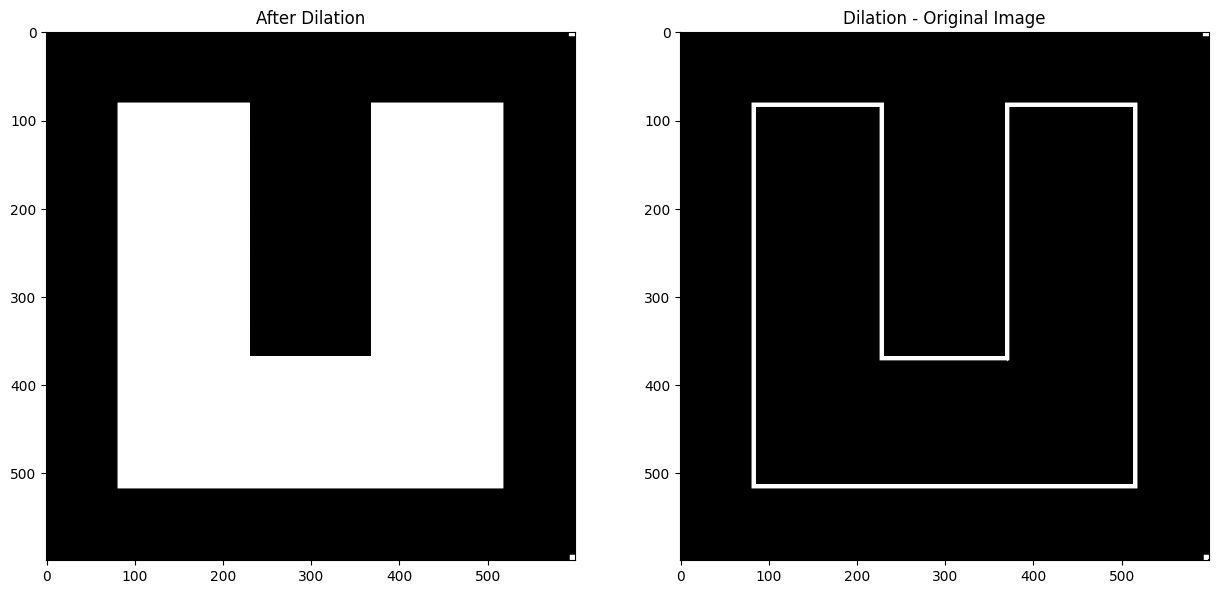

In [ ]:
# Generate outputs for Task 1 here
fig = plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
dilation = dilation(image1,10)
plt.imshow(dilation,cmap='gray')
plt.title('After Dilation')

plt.subplot(1, 2, 2)
dilation_difference = dilation - image1
plt.imshow(dilation_difference,cmap='gray')
plt.title('Dilation - Original Image')

plt.show()


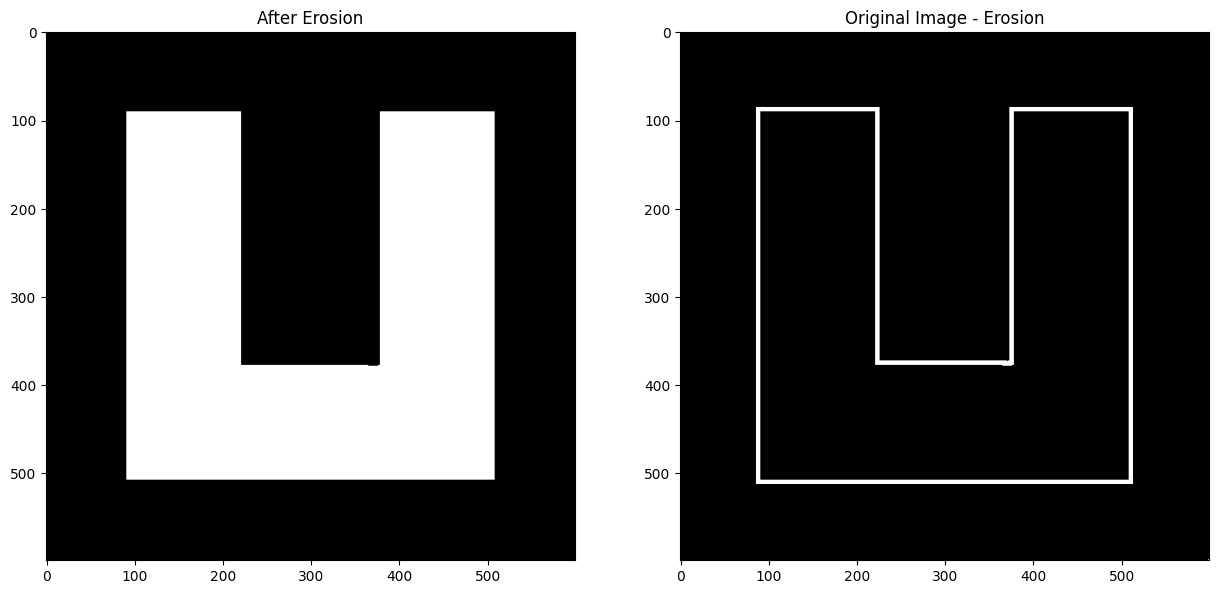

In [ ]:
fig = plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
erosion = erosion(image1,10)
plt.imshow(erosion,cmap='gray')
plt.title('After Erosion')


plt.subplot(1, 2, 2)
erosion_difference = image1 - erosion
plt.imshow(erosion_difference,cmap='gray')
plt.title('Original Image - Erosion')

plt.show()

##Analysis:
[Write your analysis here]

# Task 2
Granulometry is a field that deals with determining the size distribution of particles in an image. Determine the sizes of granules in "Fig0941(a)(wood_dowels).tif" which is an image of wood dowel plugs of two dominant sizes.

Your task is to write a function which should perform opening with circular SEs of variable sizes and generate a graph plot showing the difference in surface area vs radius of SE.

It is recommended to apply smoothing on the given image before you apply the Opening operations.

In [ ]:
from scipy.ndimage import gaussian_filter

In [ ]:
def opening(image, SE):
    eroded = cv2.erode(image, SE)
    opened_image = cv2.dilate(eroded, SE)
    return opened_image

In [ ]:
def thresholding(image):
  h,w = image.shape
  result = np.zeros((h,w))

  for i in range(h):
    for j in range(w):
      if image[i][j] <= 127 :
        result[i][j] = 0
      else:
        result[i][j] = 255

  return result

def smooth(image,size):
  kernel = np.ones((size,size), np.float32)/(size*size)
  image_smooth = cv2.filter2D(image, -1, kernel)
  return image_smooth

In [ ]:
image_path = "/content/Fig0941(a)(wood_dowels).tif"
image2 = plt.imread(image_path)
image2 = cv2.resize(image2, (300, 300))
smooth_img = smooth(image2,3)
thresholded_image = thresholding(smooth_img)

In [ ]:
def granulometry(thresholded_image):
    result = []
    for i in range(1, 31):
        structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i, i))

        opened_image = opening(thresholded_image, structuring_element)

        mean_intensity = np.mean(opened_image)
        result.append(mean_intensity)

    return result

# Task 2: Output and Analysis
Use your previously implemented functions to show the output of the granulometry technique on the mentioned sample image.

Provide your analysis on the following topic:
<ol>
<li> Why is it recommended to apply smoothing first before performing the opening? </li>

</ol>

Text(0.5, 1.0, 'Differences')

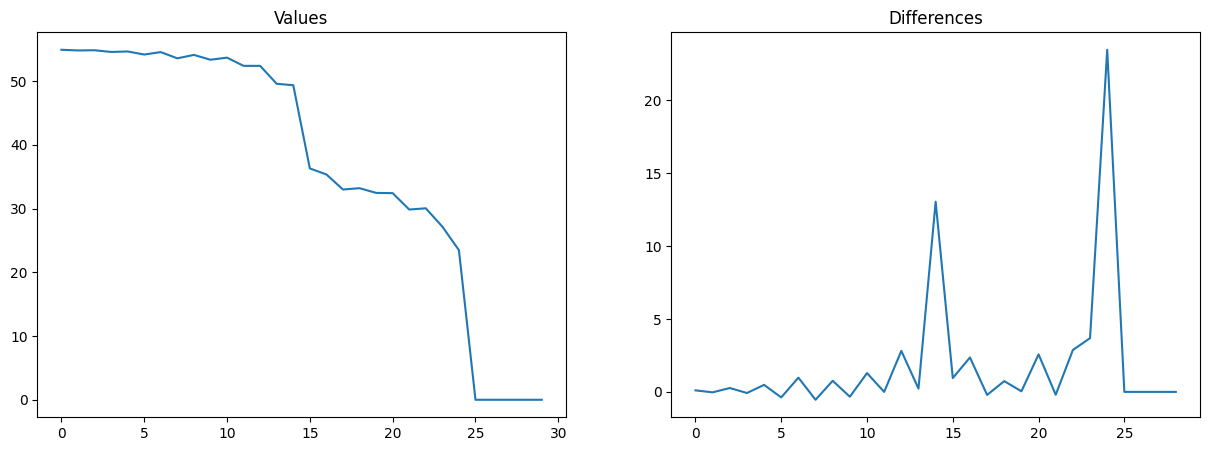

In [ ]:
result=granulometry(thresholded_image)
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(result)
plt.title('Values')


plt.subplot(1, 2, 2)
plt.plot(-np.diff(result))
plt.title('Differences')

## Analysis:
[Write your analysis here]

# Task 3
Consider the image given in "FigP0934(blobs_in_circular_arrangement).tif", which shows a region of small circles enclosed by a region of larger circles. Locate the boundary between those distinct texture regions.

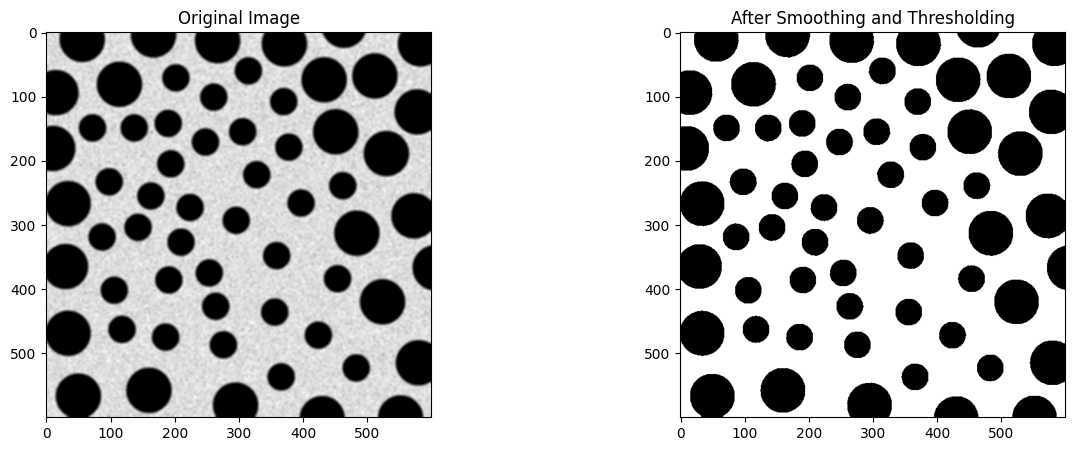

In [ ]:
image_path = "/content/FigP0934(blobs_in_circular_arrangement).tif"
image3 = plt.imread(image_path)
image3 = smooth(image3,5)
temp = thresholding(image3)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(image3,cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(temp, cmap = 'gray')
plt.title('After Smoothing and Thresholding')

plt.show()

In [ ]:
se_radius=10

In [ ]:
def locateBoundary(image):
    # Morphological Closing with appropriate radius
    structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
    step1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, structuring_element, iterations=1)

    # Morphological Opening with appropriate radius
    structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (60, 60))
    step2 = cv2.morphologyEx(step1, cv2.MORPH_OPEN, structuring_element, iterations=2)

    # Boundary Extraction (Dilation - Erosion)
    dilation = cv2.dilate(step2, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (se_radius, se_radius)))
    erosion = cv2.erode(step2, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (se_radius, se_radius)))
    boundary = dilation - erosion

    # Superimpose the boundary on the original image
    image_with_boundary = cv2.add(boundary, image)

    return image_with_boundary


# Task 3: Output and Analysis
Show the output of the locateBoundary function on the mentioned sample image.

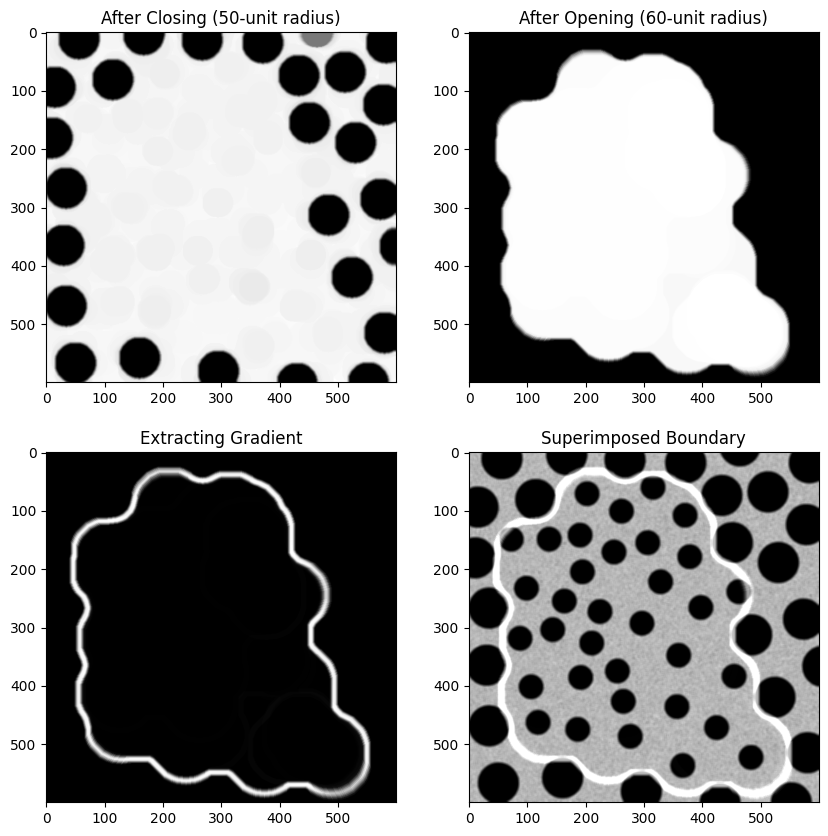

In [ ]:
#Generate output for Task 3 here
def visualizeBoundaryExtraction(image):
    fig = plt.figure(figsize=(10, 10))

    # Original image for reference
    plt.subplot(2, 2, 1)
    structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
    step1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, structuring_element, iterations=1)
    plt.imshow(step1, cmap='gray')
    plt.title('After Closing (50-unit radius)')

    plt.subplot(2, 2, 2)
    structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (60, 60))
    step2 = cv2.morphologyEx(step1, cv2.MORPH_OPEN, structuring_element, iterations=2)
    plt.imshow(step2, cmap='gray')
    plt.title('After Opening (60-unit radius)')

    plt.subplot(2, 2, 3)
    dilation = cv2.dilate(step2, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (se_radius, se_radius)))
    erosion = cv2.erode(step2, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (se_radius, se_radius)))
    boundary = dilation - erosion
    plt.imshow(boundary, cmap='gray')
    plt.title('Extracting Gradient')

    plt.subplot(2, 2, 4)
    superimposed_boundary = cv2.add(boundary, image)
    plt.imshow(superimposed_boundary, cmap='gray')
    plt.title('Superimposed Boundary')

    plt.show()

locateBoundary(image3)
visualizeBoundaryExtraction(image3)


#Task 4
A preprocessing step in an application of microscopy is concerned with the issue of isolating individual round particles from similar particles that overlap in groups of two or more particles as shown in the image "FigP0936(bubbles_on_black_background).tif".

Assuming that all particles are of the same size, propose a morphological algorithm that produces three images consisting respectively of
<ol>
<li> Only of particles that have merged with the boundary of the image.</li>

<li> Only overlapping particles.</li>

<li> Only nonoverlapping particles.</li>

</ol>

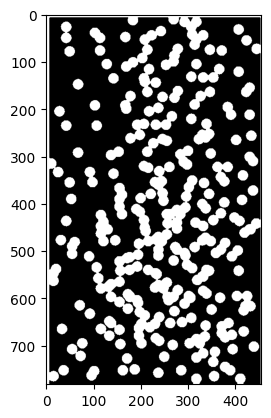

In [ ]:
image_path = "/content/FigP0936(bubbles_on_black_background).tif"
image4 = plt.imread(image_path)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
image4 = smooth(image4,3)
image4 = thresholding(image4)
image4 = image4.astype(np.uint8)
plt.imshow(image4,cmap='gray')


In [ ]:
def microscopy(image):
    boundary_particles = image.copy()
    h, w = boundary_particles.shape

    for i in range(h):
        for j in range(w):
            if (i == 0 or i == h - 1 or j == 0 or j == w - 1) and (boundary_particles[i, j] == 255):
                cv2.floodFill(boundary_particles, None, (j, i), 0)

    boundary_merged = image - boundary_particles

    temp1 = boundary_particles.copy()  # to find connected particles
    temp2 = boundary_particles.copy()  # to store overlapping particles
    temp3 = boundary_particles.copy()  # to store non-overlapping particles

    for i in range(h):
        for j in range(w):
            if temp1[i, j] == 255:

                mask = np.zeros((h + 2, w + 2), np.uint8)
                _, _, _, bounding_rect = cv2.floodFill(temp1, mask, (j, i), 0)
                x, y, w_, h_ = bounding_rect
                pixels_filled = w_ * h_


                if pixels_filled <= 550:
                    cv2.floodFill(temp2, None, (j, i), 0)  # Non-overlapping
                else:
                    cv2.floodFill(temp3, None, (j, i), 0)  # Overlapping


    nonoverlapping_particles = temp3
    overlapping_particles = temp2

    return boundary_merged, overlapping_particles, nonoverlapping_particles

# Task 4: Output and Analysis
Show the output of the microscopy function on the mentioned sample image.

In [ ]:
#Generate output for Task 4 here
def visualizeMicroscopy(image):
    boundaryParticles, overlappingParticles, nonoverlappingParticles = microscopy(image)

    fig = plt.figure(figsize=(10, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(boundaryParticles, cmap='gray')
    plt.title('Particles merged with boundary')

    plt.subplot(1, 3, 2)
    plt.imshow(overlappingParticles, cmap='gray')
    plt.title('Overlapping particles')

    plt.subplot(1, 3, 3)
    plt.imshow(nonoverlappingParticles, cmap='gray')
    plt.title('Non-overlapping particles')

    plt.show()


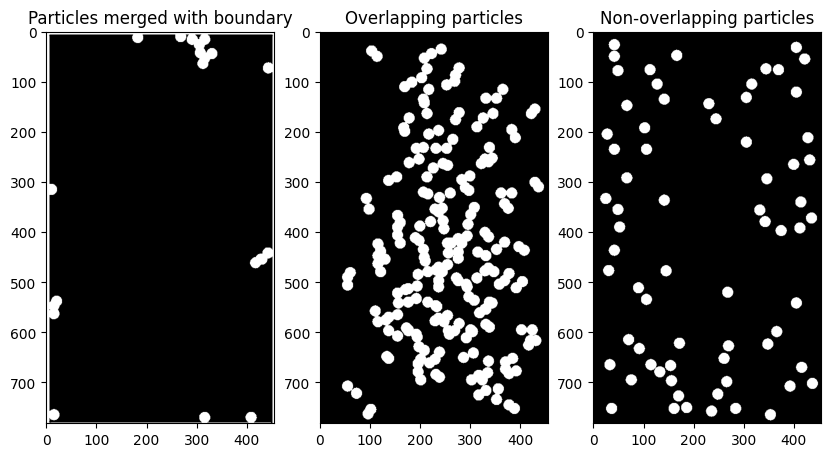

In [ ]:
image = cv2.imread('FigP0936(bubbles_on_black_background).tif', cv2.IMREAD_GRAYSCALE)
visualizeMicroscopy(image)